# Predicting Hotel

## Setting Up Project and Cleaning Data

In [1]:
# Setting Up Project with Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium
import plotly.express as px
import seaborn as sns
%matplotlib inline
import matplotlib
pd.options.mode.chained_assignment = None
matplotlib.rcParams["figure.figsize"] = (20, 20)

In [2]:
# Reading Dataset
df = pd.read_csv("hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
# Finding Current Dataset # of Rows, Columns
row_column = df.shape
print(row_column)

(119390, 32)


In [4]:
# Finding the Count of Hotel Type
hotel_count = pd.DataFrame({'guest per hotel': df.groupby('hotel')['hotel'].agg('count')})
hotel_count

guest per hotel
hotel                        
City Hotel              79330
Resort Hotel            40060

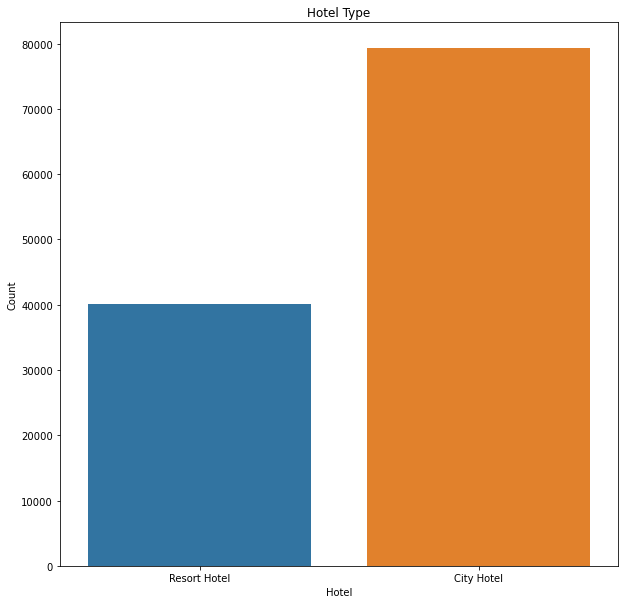

In [5]:
# Finding the Count of Hotel Type Depicted
plt.figure(figsize=(10, 10))
sns.countplot(x='hotel', data = df)
plt.title("Hotel Type")
plt.xlabel("Hotel")
plt.ylabel("Count")
plt.show()

#### More City Hotel bookings overall, two times as much.

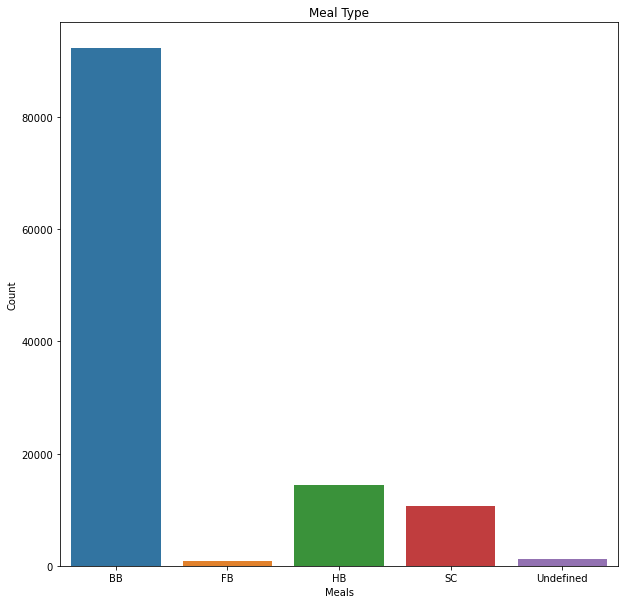

In [6]:
# Finding the Count of Meal Type Depicted
plt.figure(figsize=(10, 10))
sns.countplot(x='meal', data = df)
plt.title("Meal Type")
plt.xlabel("Meals")
plt.ylabel("Count")
plt.show()

#### More Bed and Breakfast than any other categories

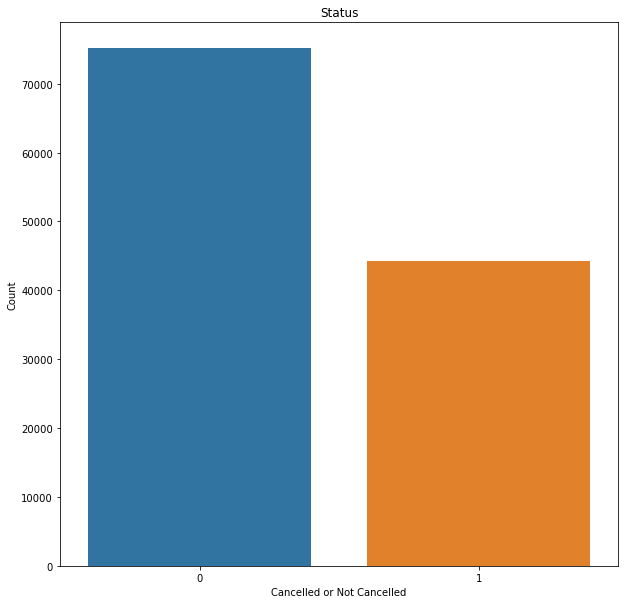

In [7]:
# Finding the Count of Cancellation Type Depicted
plt.figure(figsize=(10, 10))
sns.countplot(x='is_canceled', data = df)
plt.title("Status")
plt.xlabel("Cancelled or Not Cancelled")
plt.ylabel("Count")
plt.show()

#### 1 = Cancelled. 0 = Active/Not Cancelled. More Active/Not Cancelled Bookings than Cancelled Bookings, two times as much.

In [8]:
# Find the market segment of bookings Depicted
msegments=df["market_segment"].value_counts()
fig = px.pie(msegments,
             values=msegments.values,
             names=msegments.index,
             title="Bookings per market segment",)
fig.update_traces(textinfo="percent+label")
fig.show()

#### Almost half of bookings are made through an online Travel Agent (TA)

In [9]:
# Finding the count of Null values per column
pd.DataFrame({'Null Values': df.isnull().sum()})

Null Values
hotel                                     0
is_canceled                               0
lead_time                                 0
arrival_date_year                         0
arrival_date_month                        0
arrival_date_week_number                  0
arrival_date_day_of_month                 0
stays_in_weekend_nights                   0
stays_in_week_nights                      0
adults                                    0
children                                  4
babies                                    0
meal                                      0
country                                 488
market_segment                            0
distribution_channel                      0
is_repeated_guest                         0
previous_cancellations                    0
previous_bookings_not_canceled            0
reserved_room_type                        0
assigned_room_type                        0
booking_changes                           0
deposit_type                              0
agent                                 16340
company                              112593
days_in_waiting_list                      0
customer_type                             0
adr                                       0
required_car_parking_spaces               0
total_of_special_requests                 0
reservation_status                        0
reservation_status_date                   0

In [11]:
# Drop Null Values
df1 = df.dropna()
pd.DataFrame({'Null Values': df1.isnull().sum()})

Null Values
hotel                                     0
is_canceled                               0
lead_time                                 0
arrival_date_year                         0
arrival_date_month                        0
arrival_date_week_number                  0
arrival_date_day_of_month                 0
stays_in_weekend_nights                   0
stays_in_week_nights                      0
adults                                    0
children                                  0
babies                                    0
meal                                      0
country                                   0
market_segment                            0
distribution_channel                      0
is_repeated_guest                         0
previous_cancellations                    0
previous_bookings_not_canceled            0
reserved_room_type                        0
assigned_room_type                        0
booking_changes                           0
deposit_type                              0
agent                                     0
company                                   0
days_in_waiting_list                      0
customer_type                             0
adr                                       0
required_car_parking_spaces               0
total_of_special_requests                 0
reservation_status                        0
reservation_status_date                   0

In [13]:
# Dropping Duplicate Values
df2 = df1.drop_duplicates(keep='last')
df2

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
5       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
5                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
5                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
5                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
5                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [14]:
# Finding the current count of rows, columns
df2.shape

(87396, 32)

In [15]:
# Looking at the datatypes
df2.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [16]:
# Finding the number of guests per country that have not cancelled
guests_per_country = df2[df2['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_per_country.columns = ['country', 'guest count']
guests_per_country

country  guest count
0       PRT        17662
1       GBR         8448
2       FRA         7104
3       ESP         5390
4       DEU         4334
..      ...          ...
160     ZMB            1
161     SYC            1
162     MDG            1
163     SMR            1
164     FRO            1

[165 rows x 2 columns]

In [17]:
# Finding the total number of countries in dataset 
total_len_countries = len(df2[df2['is_canceled'] == 0].country.unique())
print(f"The total number of countries that didn't have guests cancel bookings are {total_len_countries}.")

The total number of countries that didn't have guests cancel bookings are 166.


In [18]:
folium.Map()
guest_per_country_map = px.choropleth(guests_per_country, locations = guests_per_country['country'],
                   color = guests_per_country['guest count'], 
                    hover_name = guests_per_country['country'],
                    title = "Originating Countries of Guests")
guest_per_country_map.show()

### The most popular is Portugal with the next popular being the United Kingdom. 

## When would the cancellation be greater than active reservations?

/Users/maychan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:87: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



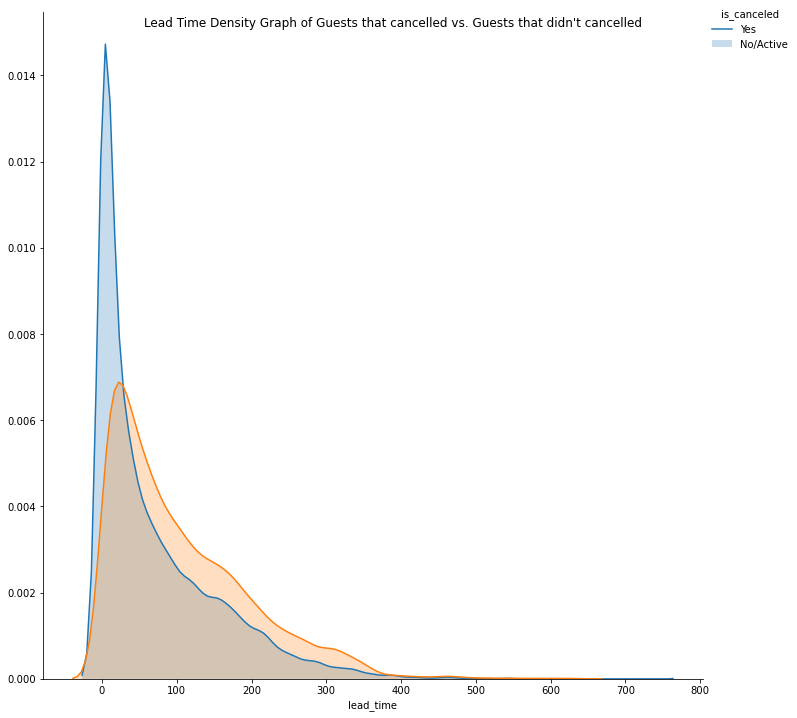

In [19]:
g = sns.FacetGrid(df2, hue="is_canceled", height=10)
g.map(sns.kdeplot, 'lead_time', shade=True).add_legend(labels=["Yes", "No/Active"])
g.fig.suptitle("Lead Time Density Graph of Guests that cancelled vs. Guests that didn't cancelled")
plt.show()

### The most cancellations are when the lead time is around 60 days. As the lead time increases between the booking date and the arrival date, the chances that an reservation will be cancelled are smaller. There will be more active and not cancelled reservations.

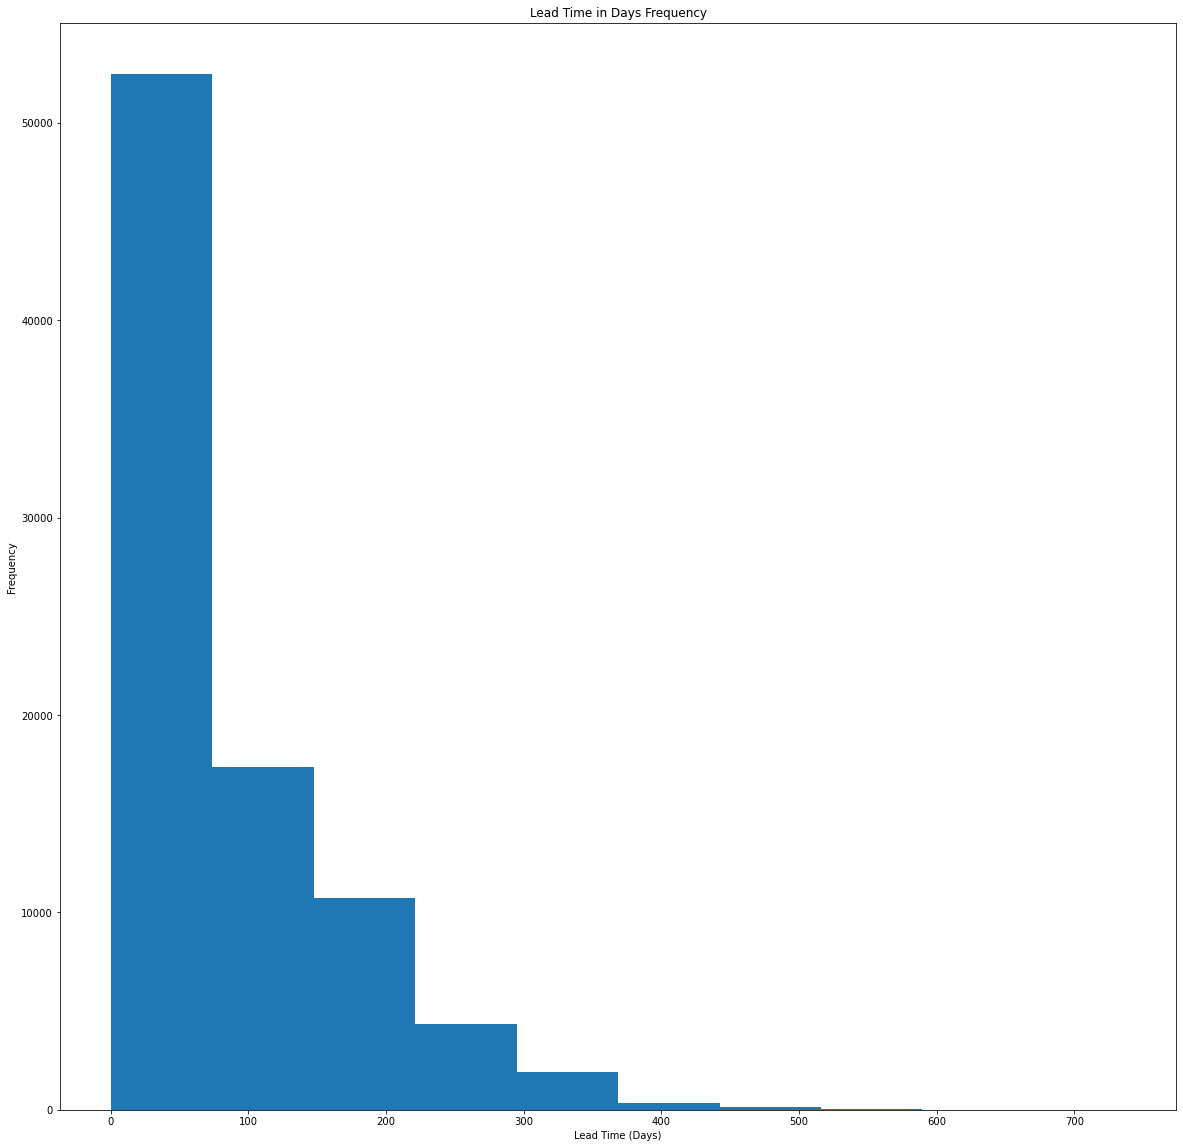

In [20]:
# Graphing the Lead Time between booking and arrival
plt.hist(df2.lead_time, rwidth=1.0)
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.title("Lead Time in Days Frequency")
plt.show()

In [21]:
# Using only the data with lead time less than or equal to 1 year
df3 = df2.loc[df1["lead_time"] <= 365]
df3.shape

(86831, 32)

In [22]:
# Describing Dataset with count, mean, etc.
df3.describe()

is_canceled     lead_time  arrival_date_year  \
count  86831.000000  86831.000000       86831.000000   
mean       0.274027     77.582211        2016.208612   
std        0.446025     81.273219           0.686532   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     48.000000        2016.000000   
75%        1.000000    123.000000        2017.000000   
max        1.000000    365.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              86831.000000               86831.000000   
mean                  26.806394                  15.809331   
std                   13.687708                   8.835150   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             86831.000000          86831.000000  86831.000000   
mean                  1.006127              2.624673      1.876438   
std                   1.030787              2.051890      0.627403   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  86827.000000  86831.000000       86831.000000            86831.000000   
mean       0.139438      0.010872           0.039329                0.030461   
std        0.457092      0.113863           0.194378                0.370146   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    86831.000000     86831.000000  74688.000000   
mean                         0.185072         0.270422     93.888349   
std                          1.737382         0.726327    113.122404   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     14.000000   
75%                          0.000000         0.000000    240.000000   
max                         72.000000        21.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  5259.000000          86831.000000  86831.000000   
mean    183.081384              0.679619    106.505423   
std     130.557608              8.780589     55.079541   
min       6.000000              0.000000     -6.380000   
25%      47.000000              0.000000     72.250000   
50%     169.000000              0.000000     98.330000   
75%     263.000000              0.000000    134.300000   
max     543.000000            259.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 86831.000000               86831.000000  
mean                      0.084578                   0.700291  
std                       0.282037                   0.832613  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000  

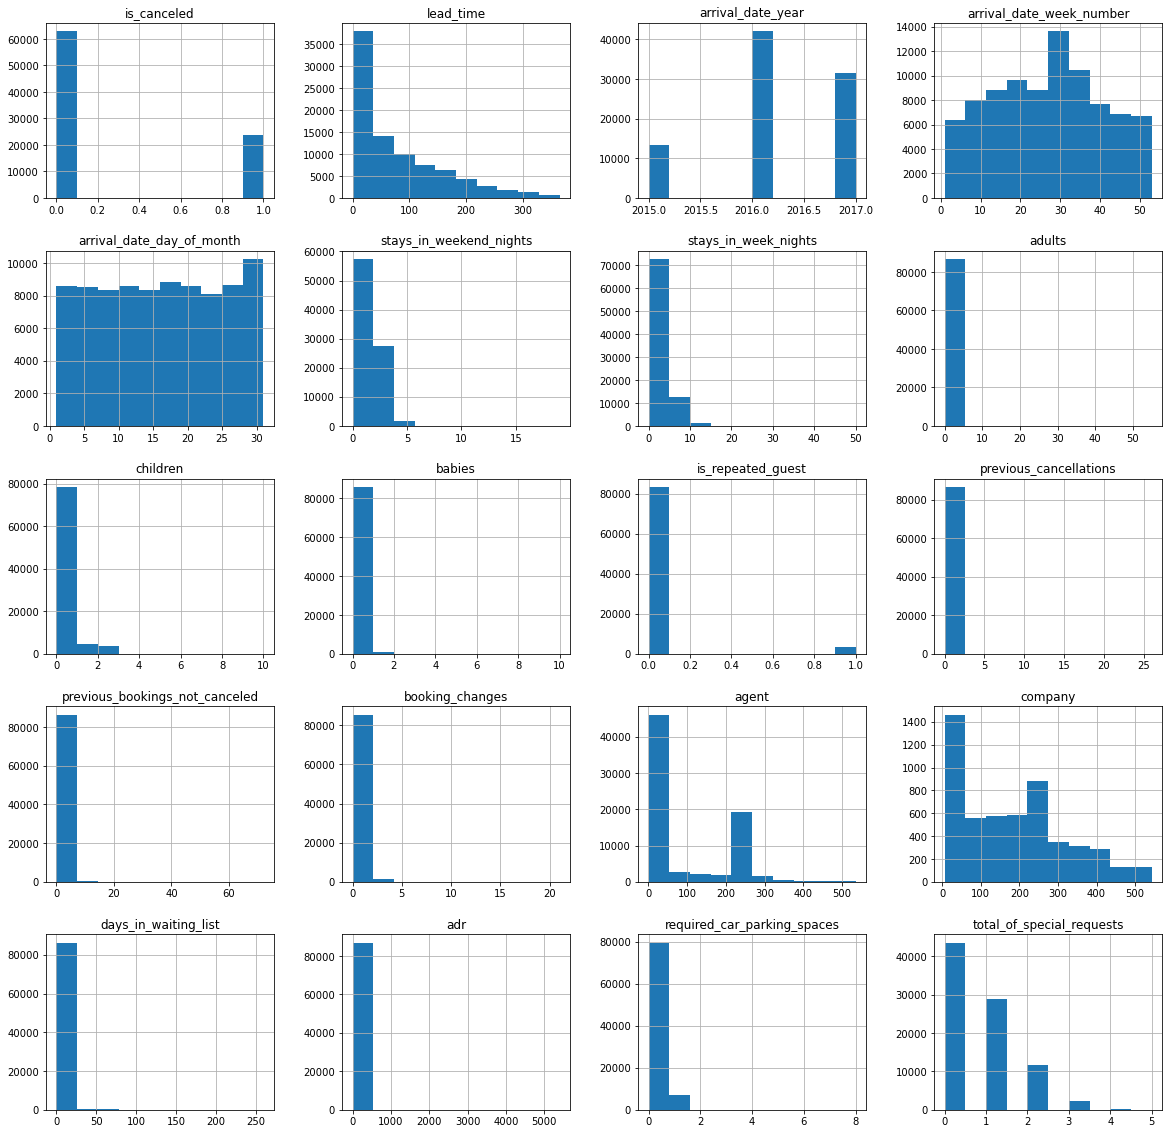

In [23]:
# Looking at the frequency of the columns
df3.hist(figsize=(20,20))
plt.show()

In [27]:
df4 = df3.copy()
df4['arrival_date_month'] = df3['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
df4['hotel'] = df3['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

In [28]:
# Using LabelEncoder to change all the data types to the same
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4['country'] = le.fit_transform(df4['country']) 
df4['meal'] = le.fit_transform(df4['meal']) 
df4['children'] = le.fit_transform(df4['children']) 
df4['distribution_channel'] = le.fit_transform(df4['distribution_channel']) 
df4['reserved_room_type'] = le.fit_transform(df4['reserved_room_type']) 
df4['market_segment'] = le.fit_transform(df4['market_segment']) 
df4['assigned_room_type'] = le.fit_transform(df4['assigned_room_type']) 
df4['customer_type'] = le.fit_transform(df4['customer_type']) 
df4['adr'] = le.fit_transform(df4['adr']) 
df4['agent'] = le.fit_transform(df4['agent']) 
df4['deposit_type'] = le.fit_transform(df4['deposit_type']) 
df4['reservation_status'] = le.fit_transform(df4['reservation_status']) 
df4['reservation_status_date'] = le.fit_transform(df4['reservation_status_date']) 
df4['company'] = le.fit_transform(df4['company']) 
df4['country'] = le.fit_transform(df4['country']) 
df4.dtypes

hotel                             int64
is_canceled                       int64
lead_time                         int64
arrival_date_year                 int64
arrival_date_month                int64
arrival_date_week_number          int64
arrival_date_day_of_month         int64
stays_in_weekend_nights           int64
stays_in_week_nights              int64
adults                            int64
children                          int64
babies                            int64
meal                              int64
country                           int64
market_segment                    int64
distribution_channel              int64
is_repeated_guest                 int64
previous_cancellations            int64
previous_bookings_not_canceled    int64
reserved_room_type                int64
assigned_room_type                int64
booking_changes                   int64
deposit_type                      int64
agent                             int64
company                           int64


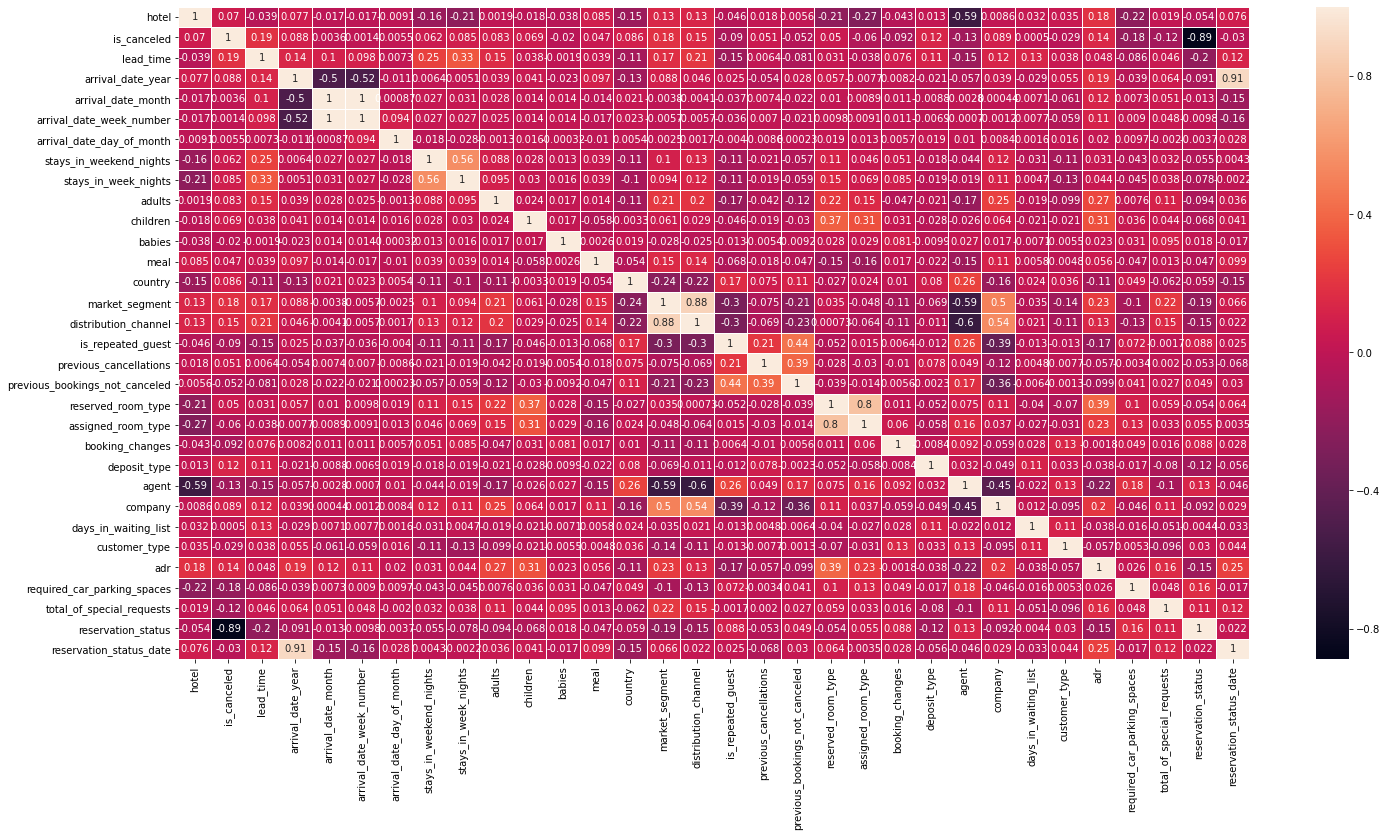

In [30]:
# Correlation Matrix
plt.figure(figsize = (24, 12))
corr = df4.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [31]:
df4.corr()

hotel  is_canceled  lead_time  \
hotel                           1.000000     0.069823  -0.038693   
is_canceled                     0.069823     1.000000   0.187448   
lead_time                      -0.038693     0.187448   1.000000   
arrival_date_year               0.077409     0.088095   0.136612   
arrival_date_month             -0.016677     0.003604   0.103572   
arrival_date_week_number       -0.017189     0.001376   0.098455   
arrival_date_day_of_month      -0.009111     0.005535   0.007309   
stays_in_weekend_nights        -0.160650     0.062329   0.254841   
stays_in_week_nights           -0.211834     0.085401   0.329873   
adults                          0.001890     0.083135   0.154207   
children                       -0.017860     0.068756   0.037824   
babies                         -0.038332    -0.020337  -0.001935   
meal                            0.084585     0.047292   0.038503   
country                        -0.150942     0.086137  -0.113536   
market_segment                  0.129929     0.184007   0.169197   
distribution_channel            0.125751     0.149830   0.206514   
is_repeated_guest              -0.045998    -0.089639  -0.150425   
previous_cancellations          0.018186     0.051217   0.006435   
previous_bookings_not_canceled  0.005596    -0.052130  -0.081080   
reserved_room_type             -0.207815     0.050197   0.031413   
assigned_room_type             -0.267350    -0.059899  -0.037524   
booking_changes                -0.042749    -0.092480   0.075721   
deposit_type                    0.012615     0.123639   0.109498   
agent                          -0.585116    -0.131589  -0.152143   
company                         0.008617     0.088819   0.124571   
days_in_waiting_list            0.032273     0.000503   0.125817   
customer_type                   0.034641    -0.029330   0.037525   
adr                             0.181675     0.144217   0.048294   
required_car_parking_spaces    -0.216432    -0.184243  -0.086139   
total_of_special_requests       0.018616    -0.118426   0.045816   
reservation_status             -0.054498    -0.887937  -0.197379   
reservation_status_date         0.076299    -0.029739   0.116172   

                                arrival_date_year  arrival_date_month  \
hotel                                    0.077409           -0.016677   
is_canceled                              0.088095            0.003604   
lead_time                                0.136612            0.103572   
arrival_date_year                        1.000000           -0.500742   
arrival_date_month                      -0.500742            1.000000   
arrival_date_week_number                -0.515055            0.995095   
arrival_date_day_of_month               -0.010749            0.000869   
stays_in_weekend_nights                  0.006380            0.027143   
stays_in_week_nights                     0.005091            0.031056   
adults                                   0.039176            0.027624   
children                                 0.041363            0.014427   
babies                                  -0.023120            0.014188   
meal                                     0.096659           -0.013619   
country                                 -0.133472            0.021353   
market_segment                           0.088024           -0.003760   
distribution_channel                     0.046110           -0.004134   
is_repeated_guest                        0.024906           -0.037341   
previous_cancellations                  -0.053695            0.007379   
previous_bookings_not_canceled           0.027601           -0.021582   
reserved_room_type                       0.057464            0.010319   
assigned_room_type                      -0.007674            0.008865   
booking_changes                          0.008189            0.010577   
deposit_type                            -0.021185           -0.008835   
agent                                 

In [32]:
df4.corr()["is_canceled"].sort_values()

reservation_status               -0.887937
required_car_parking_spaces      -0.184243
agent                            -0.131589
total_of_special_requests        -0.118426
booking_changes                  -0.092480
is_repeated_guest                -0.089639
assigned_room_type               -0.059899
previous_bookings_not_canceled   -0.052130
reservation_status_date          -0.029739
customer_type                    -0.029330
babies                           -0.020337
days_in_waiting_list              0.000503
arrival_date_week_number          0.001376
arrival_date_month                0.003604
arrival_date_day_of_month         0.005535
meal                              0.047292
reserved_room_type                0.050197
previous_cancellations            0.051217
stays_in_weekend_nights           0.062329
children                          0.068756
hotel                             0.069823
adults                            0.083135
stays_in_week_nights              0.085401
country    

In [36]:
# Dropping Unnecessary Columns
# Drop Columns that have negative correlation
# Means that the column not the deciding factor probability in that an hotel booking will be cancelled
df5 = df4.drop(['reservation_status', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes', 'assigned_room_type', "previous_bookings_not_canceled", "customer_type", "agent", "is_repeated_guest", "reservation_status_date", 'babies'], axis="columns")
df5.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      0            0        342               2015                   7   
2      0            0          7               2015                   7   
3      0            0         13               2015                   7   
5      0            0         14               2015                   7   
6      0            0          0               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
2                        27                          1   
3                        27                          1   
5                        27                          1   
6                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  meal  country  \
0                        0                     0       2  ...     0      135   
2                        0                     1       1  ...     0       59   
3                        0                     1       1  ...     0       59   
5                        0                     2       2  ...     0       59   
6                        0                     2       2  ...     0      135   

   market_segment  distribution_channel  previous_cancellations  \
0               3                     1                       0   
2               3                     1                       0   
3               2                     0                       0   
5               6                     3                       0   
6               3                     1                       0   

   reserved_room_type  deposit_type  company  days_in_waiting_list   adr  
0                   2             0      352                     0     1  
2                   0             0      352                     0  2133  
3                   0             0      352                     0  2133  
5                   0             0      352                     0  3530  
6                   2             0      352                     0  4068  

[5 rows x 21 columns]

# Models

In [38]:
# spliting the data set to easily calcaluate cancellation correlation
from sklearn.model_selection import train_test_split
y = df5["is_canceled"]
X = df5.drop(["is_canceled"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86831 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   hotel                      86831 non-null  int64
 1   is_canceled                86831 non-null  int64
 2   lead_time                  86831 non-null  int64
 3   arrival_date_year          86831 non-null  int64
 4   arrival_date_month         86831 non-null  int64
 5   arrival_date_week_number   86831 non-null  int64
 6   arrival_date_day_of_month  86831 non-null  int64
 7   stays_in_weekend_nights    86831 non-null  int64
 8   stays_in_week_nights       86831 non-null  int64
 9   adults                     86831 non-null  int64
 10  children                   86831 non-null  int64
 11  meal                       86831 non-null  int64
 12  country                    86831 non-null  int64
 13  market_segment             86831 non-null  int64
 14  distribution_channel 

## Logistic Regression

In [41]:
# preforming LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
log_reg=LogisticRegression(max_iter=5000)
log_reg.fit(X_train,y_train)  
y_pred_lreg=log_reg.predict(X_test)
classif=print("Classification Report is:\n",classification_report(y_test, y_pred_lreg))
conf=print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lreg))
training_score = print("Training Score:\n", log_reg.score(X_train,y_train)*100)
accurancy_score=print(f"\nAccuracy Score of Logistic Regression is : {accuracy_score(y_test, y_pred_lreg)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.76      0.95      0.84     18980
           1       0.58      0.18      0.27      7070

    accuracy                           0.74     26050
   macro avg       0.67      0.57      0.56     26050
weighted avg       0.71      0.74      0.69     26050

Confusion Matrix:
 [[18072   908]
 [ 5802  1268]]
Training Score:
 74.13336404468501

Accuracy Score of Logistic Regression is : 0.7424184261036468


## Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
classif=print("Classification Report is:\n",classification_report(y_test, y_pred_rfc))
conf=print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
training_score = print("Training Score:\n", rfc.score(X_train,y_train)*100)
accurancy_score=print(f"\nAccuracy Score of Random Forest Classifier is : {accuracy_score(y_test,y_pred_rfc)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     18980
           1       0.66      0.47      0.55      7070

    accuracy                           0.79     26050
   macro avg       0.74      0.69      0.71     26050
weighted avg       0.78      0.79      0.78     26050

Confusion Matrix:
 [[17280  1700]
 [ 3725  3345]]
Training Score:
 99.59362300718975

Accuracy Score of Random Forest Classifier is : 0.791746641074856


## ExtraTreesClassifier

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=200, random_state=0)
etc.fit(X_train,y_train)
y_pred_etc=etc.predict(X_test)
classif=print("Classification Report is:\n", classification_report(y_test, y_pred_etc))
conf=print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_etc))
training_score = print("Training Score:\n", etc.score(X_train,y_train)*100)
accurancy_score=print(f"\nAccuracy Score of Extra Trees Classifier is : {accuracy_score(y_test,y_pred_etc)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     18980
           1       0.65      0.46      0.54      7070

    accuracy                           0.79     26050
   macro avg       0.74      0.69      0.70     26050
weighted avg       0.77      0.79      0.77     26050

Confusion Matrix:
 [[17214  1766]
 [ 3786  3284]]
Training Score:
 99.59362300718975

Accuracy Score of Extra Trees Classifier is : 0.7868714011516315


## Ada Boost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator = None)
ada.fit(X_train, y_train)
y_pred_ada=ada.predict(X_test)
classif=print("Classification Report is:\n", classification_report(y_test, y_pred_ada))
conf=print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
training_score = print("Training Score:\n", ada.score(X_train,y_train)*100)
accurancy_score=print(f"\nAccuracy Score of Ada Boost Classifier is : {accuracy_score(y_test, y_pred_ada)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85     18980
           1       0.61      0.26      0.36      7070

    accuracy                           0.75     26050
   macro avg       0.69      0.60      0.60     26050
weighted avg       0.73      0.75      0.72     26050

Confusion Matrix:
 [[17789  1191]
 [ 5245  1825]]
Training Score:
 75.5597966469785

Accuracy Score of Ada Boost Classifier is : 0.752936660268714


## Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
classif=print("Classification Report is:\n", classification_report(y_test, y_pred_gbc))
conf=print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
training_score = print("Training Score:\n", gbc.score(X_train,y_train)*100)
accurancy_score=print(f"\nAccuracy Score of Ada Boost Classifier is : {accuracy_score(y_test,y_pred_gbc)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86     18980
           1       0.67      0.27      0.38      7070

    accuracy                           0.77     26050
   macro avg       0.72      0.61      0.62     26050
weighted avg       0.75      0.77      0.73     26050

Confusion Matrix:
 [[18054   926]
 [ 5170  1900]]
Training Score:
 76.84473766473076

Accuracy Score of Ada Boost Classifier is : 0.7659884836852208


## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
classif=print("Classification Report is:\n", classification_report(y_test, y_pred_dtc))
conf=print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
training_score = print("Training Score:\n", dtc.score(X_train,y_train)*100)
accurancy_score=print(f"\nAccuracy Score of Decision Tree Classifier is : {accuracy_score(y_test,y_pred_dtc)}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82     18980
           1       0.52      0.54      0.53      7070

    accuracy                           0.74     26050
   macro avg       0.67      0.68      0.68     26050
weighted avg       0.74      0.74      0.74     26050

Confusion Matrix:
 [[15520  3460]
 [ 3273  3797]]
Training Score:
 99.59362300718975

Accuracy Score of Decision Tree Classifier is : 0.741535508637236


# Random Forest Tree Classifier have the highest accuracy score with 79.17% accuracy to the is_cancelled variable